# <span style="color:red">**PRAICP-1002 - Traffic Sign Classification**</span>

#### ***Team ID: PTID-AI-APR-25-1112***

## **Business Case**

To develop a machine learning model that can detect and classify traffic signs from images, assisting in real-time traffic systems and autonomous driving.

## **Problem Statement**

Develop a machine learning model to detect and classify traffic signs from images.



Improve road safety by assisting vehicles in recognizing signs accurately.


Support autonomous vehicles and smart traffic systems with real-time sign detection.


Handle various types of signs under different lighting, angles, and weather conditions.




In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing Libraries**

In [ ]:

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
from PIL import Image
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import tensorflow.keras as keras


from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import Precision, Recall

## **Loading Dataset**

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/sign_detection/labels.csv')

In [ ]:
data

,ClassId,Name
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


## ***Insights***

➤ We have 43 category and labels for each category

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ClassId  43 non-null     int64 
 1   Name     43 non-null     object
dtypes: int64(1), object(1)
memory usage: 820.0+ bytes


In [ ]:
data_dir = "/content/drive/MyDrive/sign_detection"

In [ ]:
train_dir=os.path.join(data_dir,'Train')
test_dir=os.path.join(data_dir,'Test')

In [ ]:
categories = os.listdir(train_dir)
NUM_CATEGORIES = len(categories)

print("Number of categories:", NUM_CATEGORIES)
print("Categories:", categories)


Number of categories: 43
Categories: ['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '5', '6', '7', '8', '9']


## **Image Preprocessing**

In [ ]:
dim1 = []
dim2 = []

for i in range(0,43):
    labels = train_dir + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = imread(labels + '/' + x)
        dim1.append(img.shape[0])
        dim2.append(img.shape[1])

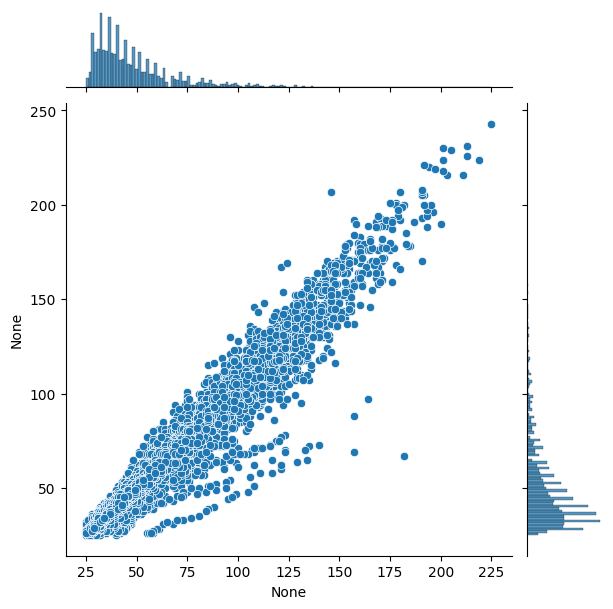

In [ ]:
sns.jointplot(x=dim1, y=dim2)
plt.show()

In [ ]:
np.mean(dim1)

np.float64(50.328929582493814)

In [ ]:
np.mean(dim2)

np.float64(50.83587951745773)

## ***Insights***

➤ Since the mean of both dimensions is around 50 , we will use (50x50) as the shape of images

In [ ]:
image_shape = (50,50)

In [ ]:
image_data = []
image_labels = []

for i in range(NUM_CATEGORIES):
    path = data_dir + '/Train/' + str(i)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((50,50))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error in " + img)

# Changing the list to numpy array
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)

(39209, 50, 50, 3) (39209,)


## ***Insights***

➤ The dataset contains 39,209 RGB images of size 50x50 pixels each, with corresponding labels for classification.

In [ ]:
test_dir = data_dir + '/Test'
print("Folders in Test directory:", os.listdir(test_dir))

Folders in Test directory: ['11943.png', '11331.png', '11634.png', '11706.png', '11244.png', '11570.png', '11268.png', '11257.png', '11325.png', '11368.png', '11548.png', '11698.png', '11339.png', '11505.png', '11848.png', '11363.png', '11440.png', '11422.png', '11945.png', '11854.png', '11578.png', '11925.png', '11253.png', '11934.png', '11882.png', '11938.png', '11690.png', '11753.png', '11419.png', '11307.png', '11819.png', '11573.png', '11536.png', '11672.png', '11682.png', '11868.png', '11290.png', '11881.png', '11842.png', '11386.png', '11243.png', '11712.png', '11852.png', '11398.png', '11893.png', '11732.png', '11550.png', '11410.png', '11601.png', '11316.png', '11662.png', '11262.png', '11675.png', '11364.png', '11547.png', '11576.png', '11632.png', '11402.png', '11411.png', '11616.png', '11371.png', '11837.png', '11511.png', '11648.png', '11829.png', '11401.png', '11415.png', '11883.png', '11716.png', '11630.png', '11297.png', '11735.png', '11827.png', '11265.png', '11467.png

In [ ]:
test_df = pd.read_csv(os.path.join(data_dir, 'Test.csv'))

In [ ]:
test_folder = os.path.join(data_dir, 'Test')
csv_path = os.path.join(data_dir, 'Test.csv')

if not os.path.exists(csv_path):
    raise FileNotFoundError(f"CSV not found: {csv_path}")

with open(csv_path, 'r') as f:
    first_line = f.readline()
    print("First line of CSV:", first_line)


test_df = pd.read_csv(csv_path)
print(test_df.head())
test_image_data = []
test_image_labels = []

for idx, row in test_df.iterrows():
    filename = row['Path']
    label = row['ClassId']

    image_path = os.path.join(data_dir, filename)

    image = cv2.imread(image_path)
    if image is None:
        print("Error in", filename)
        continue
    try:
        # Resize image using cv2.resize
        resized_image = cv2.resize(image, (50, 50))
        test_image_data.append(resized_image)
        test_image_labels.append(label)
    except Exception as e:
         print(f"Resize error for {image_path}: {e}")


test_image_data = np.array(test_image_data)
test_image_labels = np.array(test_image_labels)

print("Test data shape:", test_image_data.shape)
print("Test labels shape:", test_image_labels.shape)

First line of CSV: Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path

   Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId            Path
0     53      54       6       5      48      49       16  Test/00000.png
1     42      45       5       5      36      40        1  Test/00001.png
2     48      52       6       6      43      47       38  Test/00002.png
3     27      29       5       5      22      24       33  Test/00003.png
4     60      57       5       5      55      52       11  Test/00004.png
Test data shape: (12630, 50, 50, 3)
Test labels shape: (12630,)


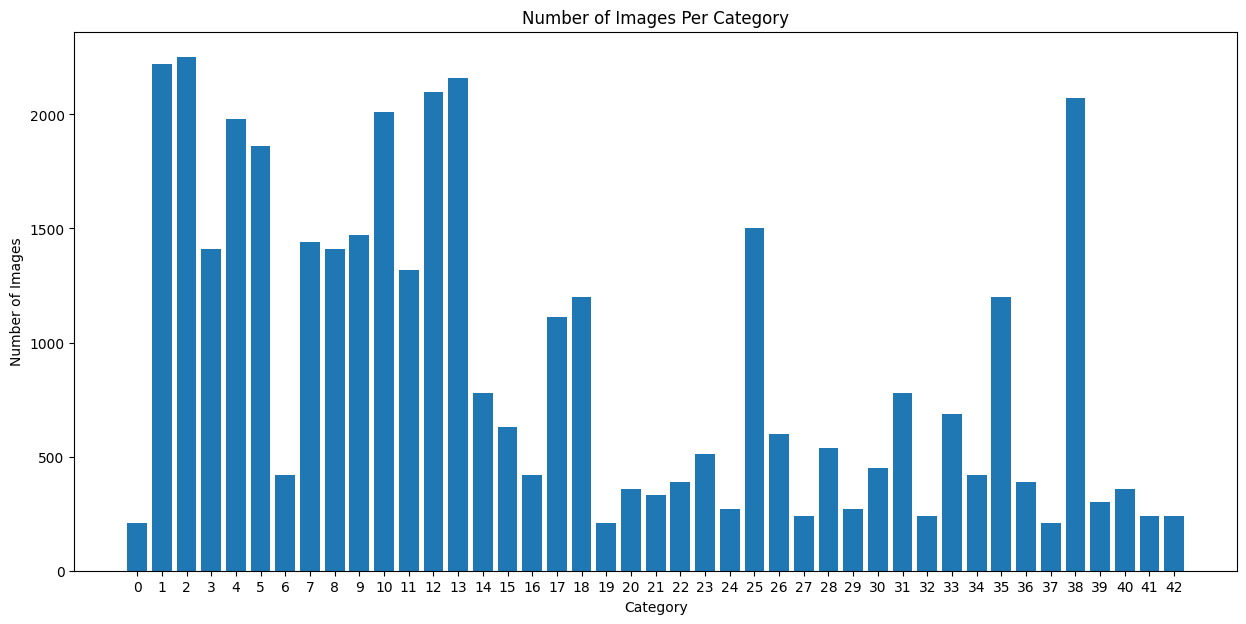

In [ ]:
category_counts = {}
for label in image_labels:
    if label in category_counts:
        category_counts[label] += 1
    else:
        category_counts[label] = 1
sorted_categories = sorted(category_counts.keys())
counts = [category_counts[cat] for cat in sorted_categories]

# Create a bar graph
plt.figure(figsize=(15, 7))
plt.bar(sorted_categories, counts)
plt.xlabel("Category")
plt.ylabel("Number of Images")
plt.title("Number of Images Per Category")
plt.xticks(sorted_categories)
plt.show()

## ***Insights***

➤ The dataset shows a significant class imbalance, with some categories having over 2000 images while others have fewer than 400

➤ This could bias the model toward dominant classes and reduce accuracy on underrepresented signs.

## **Visualization**

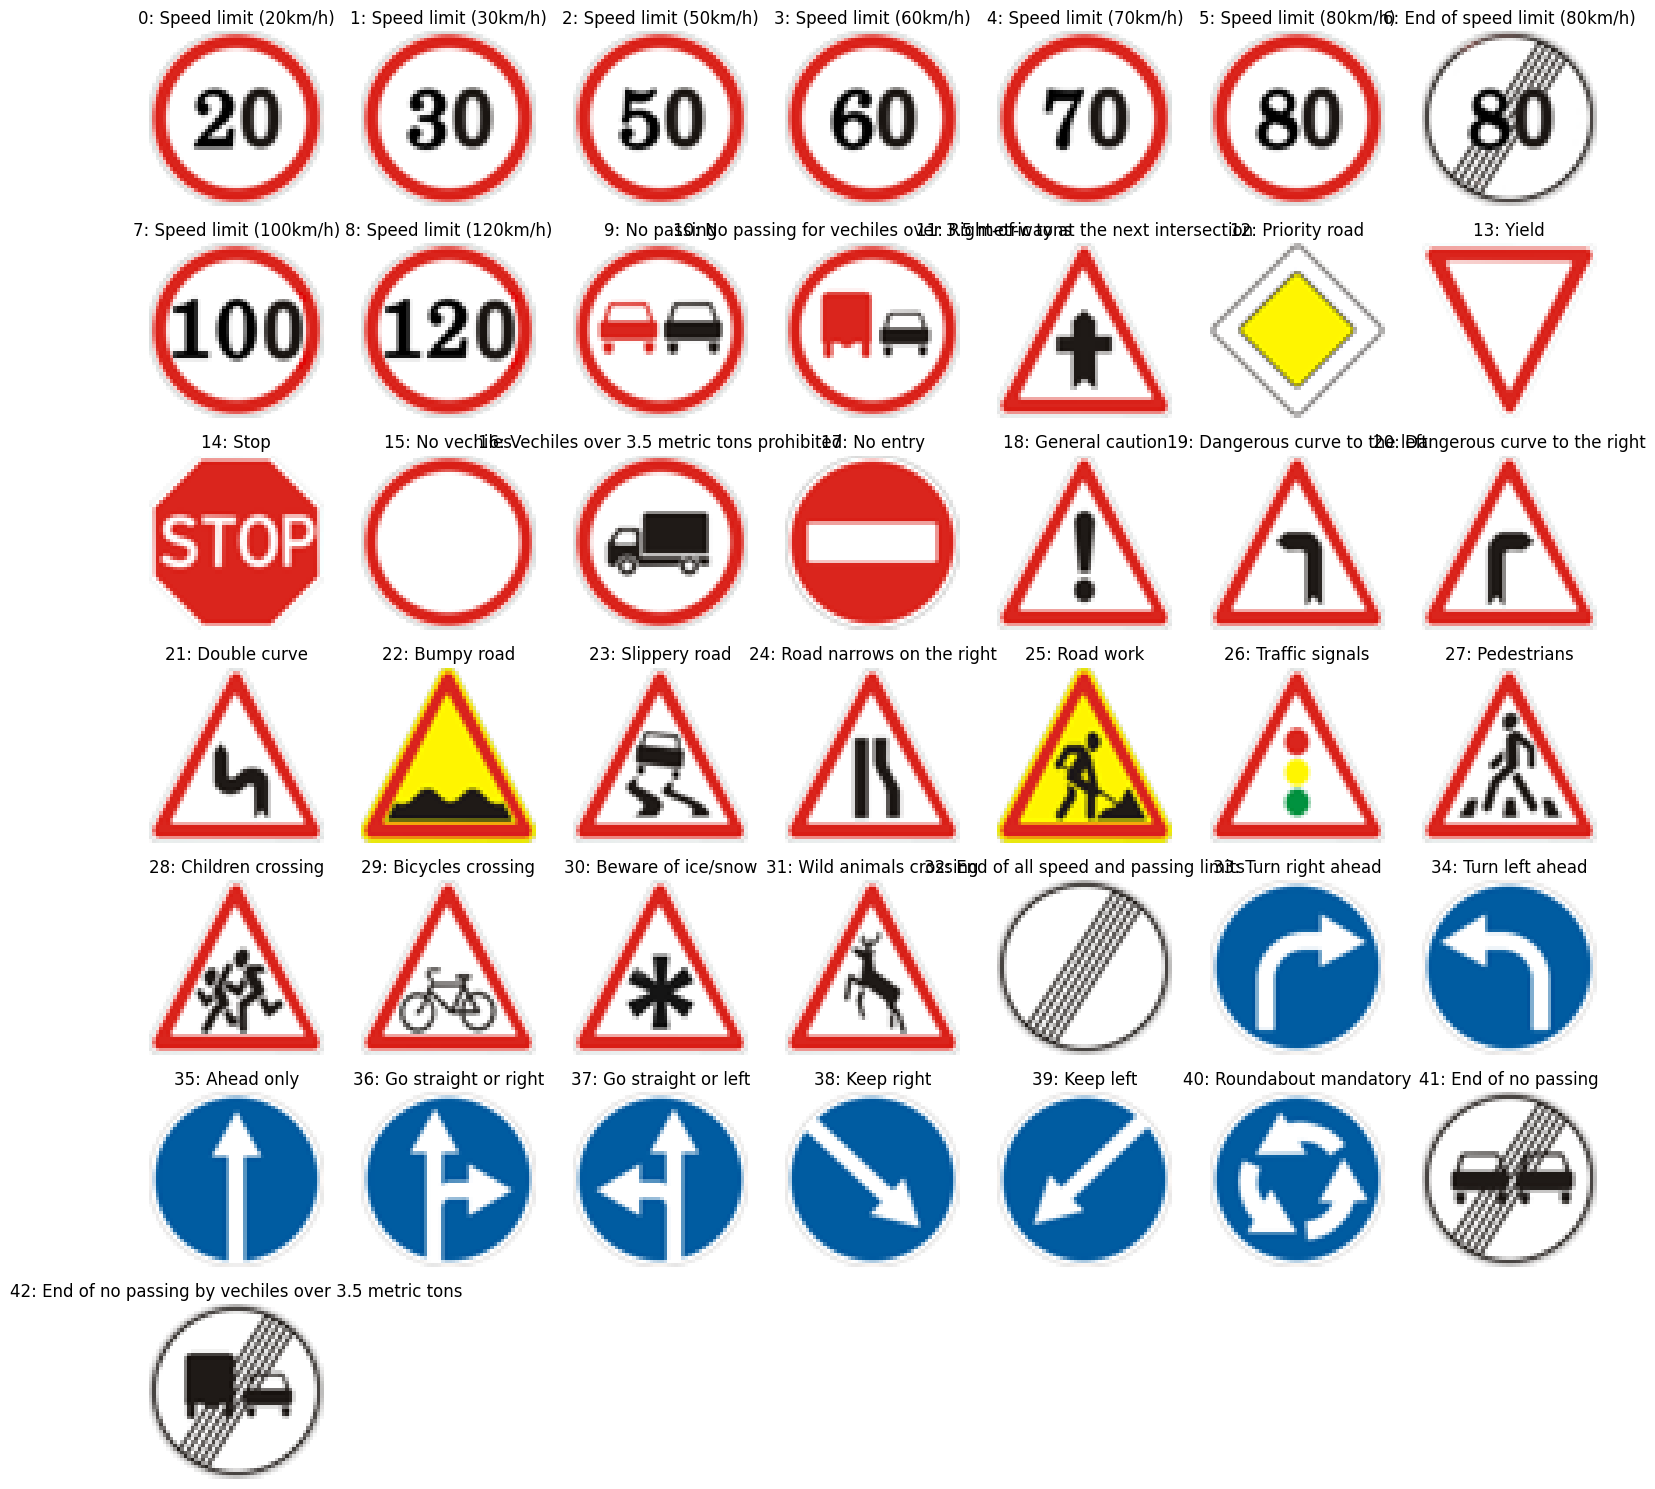

In [ ]:
meta_images = []
meta_labels = []

for i in range(NUM_CATEGORIES):
  path = data_dir + '/Meta/' + str(i) + '.png'
  try:
    img = Image.open(path)
    resize_image = img.resize((50,50))
    meta_images.append(np.array(resize_image))
    meta_labels.append(i)
  except FileNotFoundError:
    print(f"Meta image not found for category {i}")
    meta_images.append(np.zeros((50,50,3), dtype=np.uint8))
    meta_labels.append(i)

plt.figure(figsize=(10, 10))
for i in range(NUM_CATEGORIES):
    plt.subplot(7, 7, i + 1)
    plt.imshow(meta_images[i])

    label_description = data[data['ClassId'] == meta_labels[i]]['Name'].iloc[0]
    plt.title(f"{meta_labels[i]}: {label_description}")
    plt.axis('off')

plt.tight_layout()
plt.show()

## ***Insights***


➤ The displayed grid of 43 images showcases one sample per traffic sign category,

➤ **Lighting and Quality Issues:** Some images are too dark or blurry, which  affect model performance brightness normalization or enhancement is required

In [ ]:
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

## **Splitting the data into train and validation set**

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.01, random_state=42, shuffle=True)

# Normalize the images
x_train = x_train / 255.0
x_val = x_val / 255.0

print("X_train.shape", x_train.shape)
print("X_val.shape", x_val.shape)
print("y_train.shape", y_train.shape)
print("y_val.shape", y_val.shape)


X_train.shape (38816, 50, 50, 3)
X_val.shape (393, 50, 50, 3)
y_train.shape (38816,)
y_val.shape (393,)


## **One hot encoding the labels**

In [ ]:
y_train = keras.utils.to_categorical(y_train, NUM_CATEGORIES)
y_val = keras.utils.to_categorical(y_val, NUM_CATEGORIES)

print(y_train.shape)
print(y_val.shape)

(38816, 43)
(393, 43)


## **Class weights**

➤ class weights helps the model handle imbalanced datasets better

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

unique_classes = np.unique(image_labels)
class_weights_array = compute_class_weight(
    class_weight='balanced',
    classes=unique_classes,
    y=image_labels
)

class_weights = dict(zip(unique_classes, class_weights_array))

print("Class Weights:")
for cls, weight in class_weights.items():
    print(f"Class {cls}: Weight = {weight:.4f}")


Class Weights:
Class 0: Weight = 4.3421
Class 1: Weight = 0.4107
Class 2: Weight = 0.4053
Class 3: Weight = 0.6467
Class 4: Weight = 0.4605
Class 5: Weight = 0.4902
Class 6: Weight = 2.1710
Class 7: Weight = 0.6332
Class 8: Weight = 0.6467
Class 9: Weight = 0.6203
Class 10: Weight = 0.4537
Class 11: Weight = 0.6908
Class 12: Weight = 0.4342
Class 13: Weight = 0.4221
Class 14: Weight = 1.1690
Class 15: Weight = 1.4474
Class 16: Weight = 2.1710
Class 17: Weight = 0.8215
Class 18: Weight = 0.7599
Class 19: Weight = 4.3421
Class 20: Weight = 2.5329
Class 21: Weight = 2.7631
Class 22: Weight = 2.3380
Class 23: Weight = 1.7879
Class 24: Weight = 3.3772
Class 25: Weight = 0.6079
Class 26: Weight = 1.5197
Class 27: Weight = 3.7993
Class 28: Weight = 1.6886
Class 29: Weight = 3.3772
Class 30: Weight = 2.0263
Class 31: Weight = 1.1690
Class 32: Weight = 3.7993
Class 33: Weight = 1.3234
Class 34: Weight = 2.1710
Class 35: Weight = 0.7599
Class 36: Weight = 2.3380
Class 37: Weight = 4.3421
Class 3

## **Model Building**

## **CNN Model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D

model = Sequential()

#1st layer
model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = (50,50,3), activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

#2nd layer
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

#3rd layer
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

#Dense layer
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(43, activation = 'softmax'))

In [ ]:
from tensorflow.keras.optimizers import Adam

lr = 0.001
epochs = 20

opt = Adam(learning_rate=lr, decay=lr / (epochs * 0.5))
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 50, 50, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 23, 23, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 9, 9, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 212,395 (829.67 KB)

 Trainable params: 212,395 (829.67 KB)

 Non-trainable params: 0 (0.00 B)

## **Data augmentation**

➤ Data augmentation is a technique used to increase the size and diversity of a dataset by making small changes to the existing data, such as rotating, flipping, or cropping images.

➤ By applying augmentation techniques, we can ensure the model can still correctly identify and classify traffic signs, even when they are not perfectly captured. This increases the accuracy and safety of systems like autonomous driving or driver assistance.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    brightness_range=(0.8, 1.2),
    fill_mode="nearest")

history = model.fit(aug.flow(x_train, y_train, batch_size=64),
                    epochs=epochs,
                    validation_data=(x_val, y_val),
                    class_weight=class_weights)



Epoch 1/20
607/607 ━━━━━━━━━━━━━━━━━━━━ 291s 472ms/step - accuracy: 0.0511 - loss: 3.6152 - val_accuracy: 0.3410 - val_loss: 2.2262
Epoch 2/20
607/607 ━━━━━━━━━━━━━━━━━━━━ 283s 466ms/step - accuracy: 0.2449 - loss: 2.4895 - val_accuracy: 0.5140 - val_loss: 1.5763
Epoch 3/20
607/607 ━━━━━━━━━━━━━━━━━━━━ 324s 469ms/step - accuracy: 0.3487 - loss: 2.0392 - val_accuracy: 0.5802 - val_loss: 1.2518
Epoch 4/20
607/607 ━━━━━━━━━━━━━━━━━━━━ 284s 467ms/step - accuracy: 0.4284 - loss: 1.6970 - val_accuracy: 0.7099 - val_loss: 0.9381
Epoch 5/20
607/607 ━━━━━━━━━━━━━━━━━━━━ 282s 464ms/step - accuracy: 0.4908 - loss: 1.4239 - val_accuracy: 0.7074 - val_loss: 0.8429
Epoch 6/20
607/607 ━━━━━━━━━━━━━━━━━━━━ 325s 468ms/step - accuracy: 0.5416 - loss: 1.2565 - val_accuracy: 0.8270 - val_loss: 0.5821
Epoch 7/20
607/607 ━━━━━━━━━━━━━━━━━━━━ 284s 468ms/step - accuracy: 0.5869 - loss: 1.0989 - val_accuracy: 0.8499 - val_loss: 0.5009
Epoch 8/20
607/607 ━━━━━━━━━━━━━━━━━━━━ 281s 463ms/step - accuracy: 0.6109 -

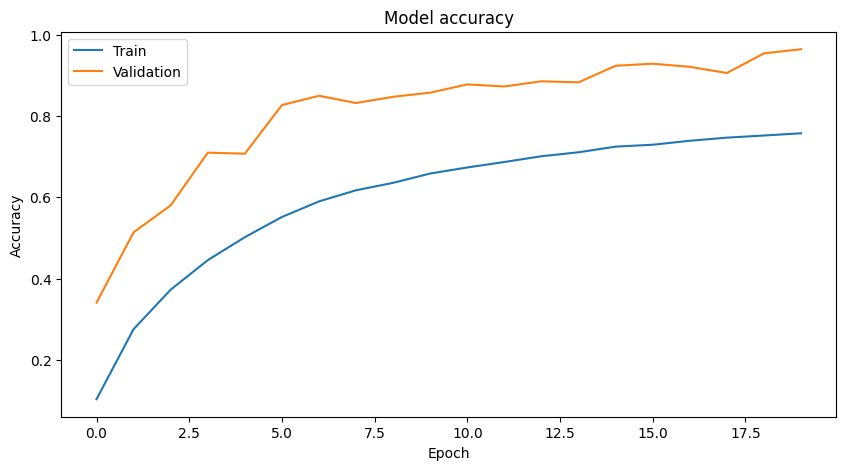

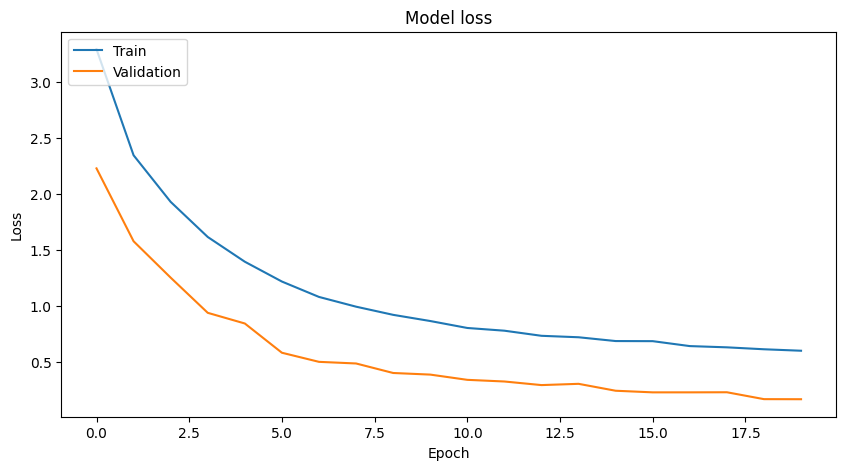

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model.save("model.h5")

In [ ]:
from tensorflow.keras.utils import to_categorical
x_test = np.array(test_image_data)
y_test = np.array(test_image_labels)
x_test = x_test / 255.0

# One-hot encode the test labels
y_test_encoded = to_categorical(y_test, NUM_CATEGORIES)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(x_test, y_test_encoded, verbose=0)

print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')


Test Loss: 0.3135
Test Accuracy: 0.9140


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step
Confusion Matrix (raw):
[[ 1  4  0 ...  0  0  0]
 [ 3 32  1 ...  0  0  0]
 [ 0  1 32 ...  0  0  0]
 ...
 [ 0  0  0 ...  7  0  0]
 [ 0  0  0 ...  0  5  0]
 [ 0  0  0 ...  0  0  2]]

Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.20      0.22         5
           1       0.84      0.82      0.83        39
           2       0.78      0.97      0.86        33
           3       1.00      0.92      0.96        26
           4       0.89      0.86      0.88        37
           5       0.77      0.71      0.74        28
           6       1.00      1.00      1.00        11
           7       0.85      0.74      0.79        23
           8       0.74      0.80      0.77        25
           9       1.00      1.00      1.00        28
          10       1.00      0.97      0.99        40
          11       1.00      1.00      1.00        18
          12       1.00      0.86      0.93        29

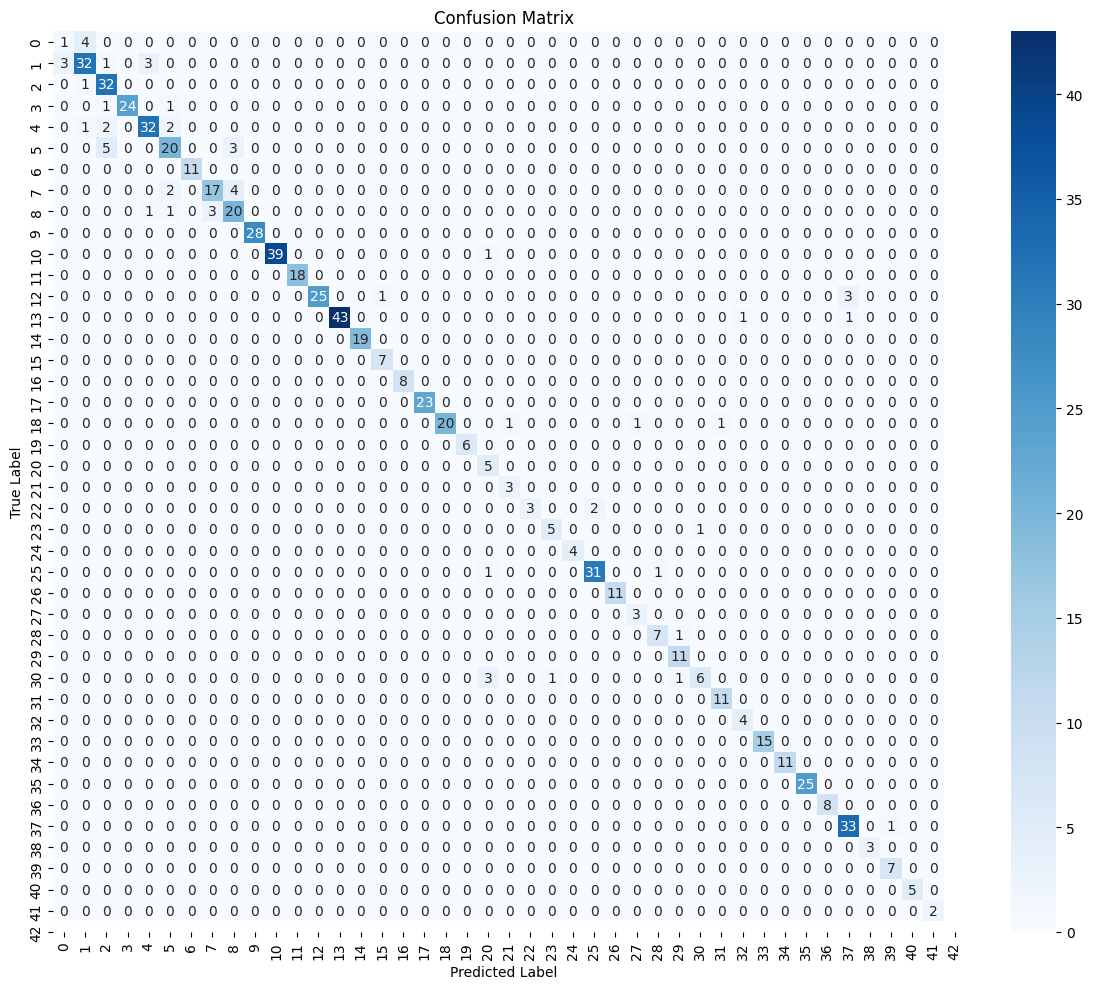

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model.predict(x_test)

# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

conf_matrix = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix (raw):")
print(conf_matrix)

# Classification report
unique_labels = np.unique(y_test)
class_report = classification_report(y_test, y_pred_classes,
                                     target_names=[str(i) for i in range(NUM_CATEGORIES)],
                                     labels=unique_labels)
print("\nClassification Report:")
print(class_report)

plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=[str(i) for i in range(NUM_CATEGORIES)],
            yticklabels=[str(i) for i in range(NUM_CATEGORIES)])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


## **Transfer Learning**

➤ **Transfer Learning** is a deep learning technique where a pre-trained model (trained on a large dataset like ImageNet) is adapted to a new but related task.

➤ Instead of training from scratch, we reuse learned features, fine-tune some layers, and train only the classifier, saving time and improving accuracy, especially for small datasets

## **DenseNet 121**

In [ ]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model

#  the base pre-trained model
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(50, 50, 3))

# custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(43, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 50, 50, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 56, 56, 3) │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 25, 25,    │      9,408 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 25, 25,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 25, 25,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 27, 27,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 13, 13,    │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 13, 13,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 13, 13,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 13, 13,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 13, 13,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 13, 13,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 13, 13,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 13, 13,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 13, 13,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 13, 13,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 13, 13,    │     12,288 │ conv2_block2_0_r

 Total params: 8,131,179 (31.02 MB)

 Trainable params: 8,047,531 (30.70 MB)

 Non-trainable params: 83,648 (326.75 KB)

In [ ]:
history = model.fit(aug.flow(x_train, y_train, batch_size=64),
                    epochs=5,
                    validation_data=(x_val, y_val),
                    class_weight=class_weights)


Epoch 1/5
607/607 ━━━━━━━━━━━━━━━━━━━━ 1344s 2s/step - accuracy: 0.9611 - loss: 0.1162 - val_accuracy: 0.9796 - val_loss: 0.0660
Epoch 2/5
607/607 ━━━━━━━━━━━━━━━━━━━━ 1336s 2s/step - accuracy: 0.9746 - loss: 0.0826 - val_accuracy: 0.9008 - val_loss: 0.4202
Epoch 3/5
607/607 ━━━━━━━━━━━━━━━━━━━━ 1330s 2s/step - accuracy: 0.9686 - loss: 0.1021 - val_accuracy: 0.9898 - val_loss: 0.0502
Epoch 4/5
607/607 ━━━━━━━━━━━━━━━━━━━━ 1335s 2s/step - accuracy: 0.9760 - loss: 0.0820 - val_accuracy: 0.9898 - val_loss: 0.0428
Epoch 5/5
607/607 ━━━━━━━━━━━━━━━━━━━━ 1328s 2s/step - accuracy: 0.9889 - loss: 0.0356 - val_accuracy: 0.9975 - val_loss: 0.0042


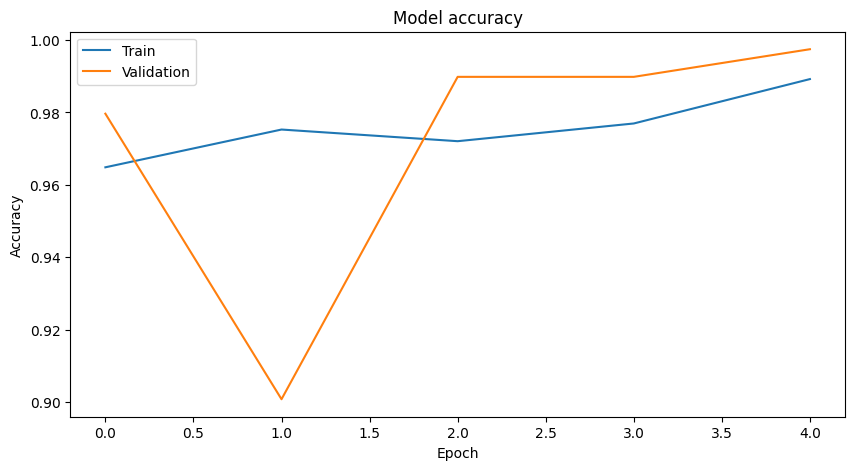

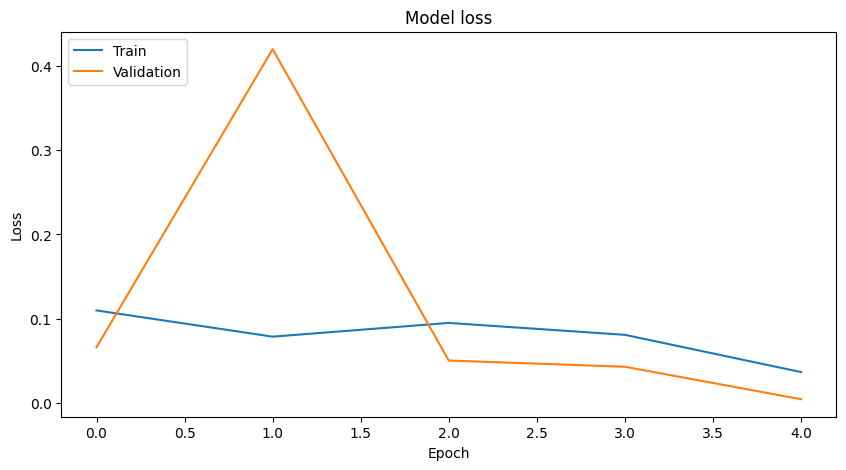

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model.save("model_Densenet.h5")

In [ ]:
x_test = np.array(test_image_data)
y_test = np.array(test_image_labels)
x_test = x_test / 255.0

y_test_encoded = to_categorical(y_test, NUM_CATEGORIES)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(x_test, y_test_encoded, verbose=0)

print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

Test Loss: 0.0771
Test Accuracy: 0.9799


22/22 ━━━━━━━━━━━━━━━━━━━━ 16s 408ms/step
Confusion Matrix (raw):
[[ 5  0  0 ...  0  0  0]
 [ 0 39  0 ...  0  0  0]
 [ 0  0 33 ...  0  0  0]
 ...
 [ 0  0  0 ...  6  0  0]
 [ 0  0  0 ...  0  5  0]
 [ 0  0  0 ...  0  0  2]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        39
           2       0.97      1.00      0.99        33
           3       1.00      0.96      0.98        26
           4       1.00      0.92      0.96        37
           5       0.97      1.00      0.98        28
           6       1.00      1.00      1.00        11
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00        25
           9       1.00      0.96      0.98        28
          10       0.98      1.00      0.99        40
          11       0.95      1.00      0.97        18
          12       0.96      0.93      0.95        

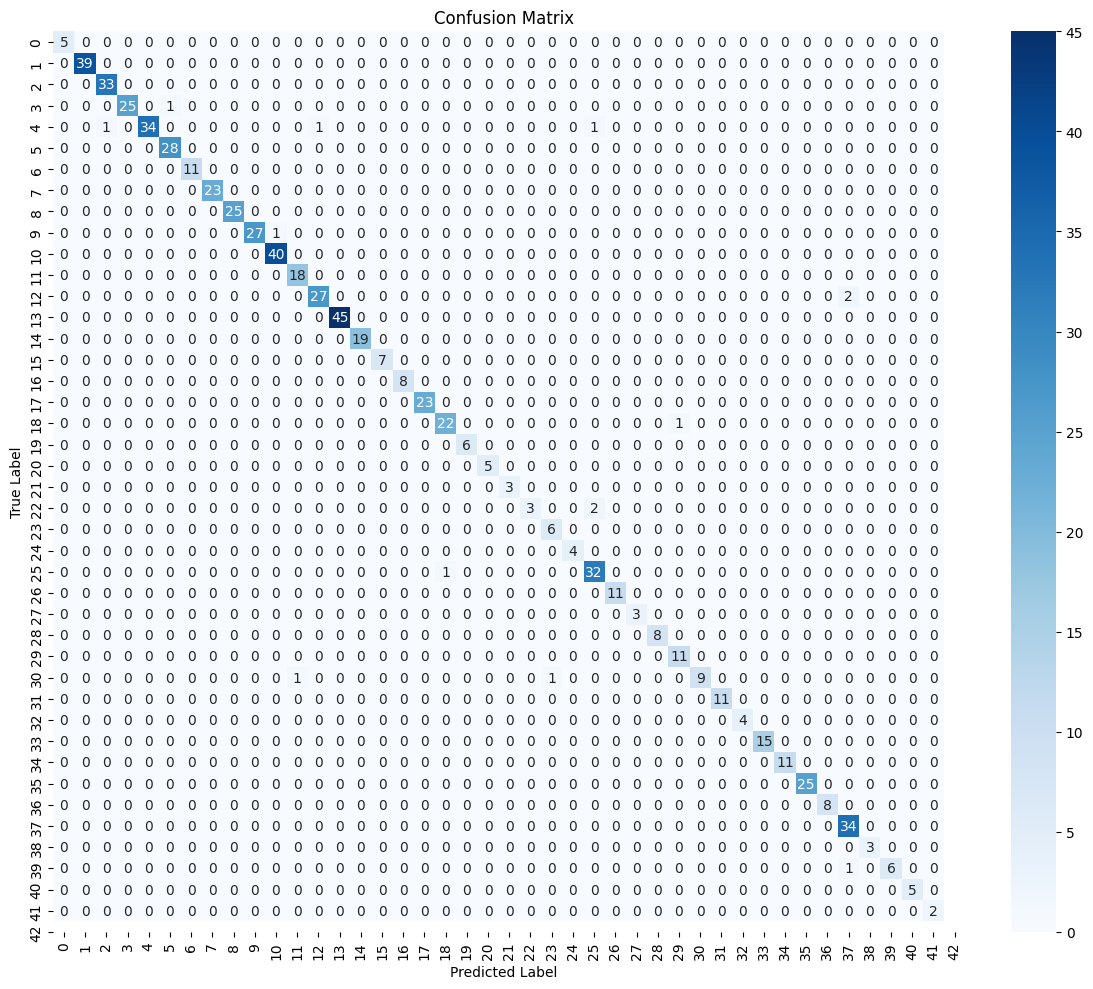

In [ ]:
y_pred = model.predict(x_test)

# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

conf_matrix = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix (raw):")
print(conf_matrix)

# Classification report
unique_labels = np.unique(y_test)
class_report = classification_report(y_test, y_pred_classes,
                                     target_names=[str(i) for i in range(NUM_CATEGORIES)],
                                     labels=unique_labels)
print("\nClassification Report:")
print(class_report)

plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=[str(i) for i in range(NUM_CATEGORIES)],
            yticklabels=[str(i) for i in range(NUM_CATEGORIES)])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


## **MobileNetV2**

In [ ]:
from tensorflow.keras.applications import MobileNetV2

# base MobileNetV2 model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(50, 50, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(43, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 50, 50, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 25, 25,    │        864 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 25, 25,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 25, 25,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 25, 25,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 25, 25,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 25, 25,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 25, 25,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 25, 25,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 25, 25,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 25, 25,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 25, 25,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 27, 27,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 13, 13,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 13, 13,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 13, 13,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 13, 13,    │      2,304 │ block_1_depthwis

 Total params: 3,613,803 (13.79 MB)

 Trainable params: 3,579,691 (13.66 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [ ]:
history = model.fit(aug.flow(x_train, y_train, batch_size=64),
                    epochs=5,
                    validation_data=(x_val, y_val),
                    class_weight=class_weights)

Epoch 1/5
607/607 ━━━━━━━━━━━━━━━━━━━━ 545s 831ms/step - accuracy: 0.4939 - loss: 1.8013 - val_accuracy: 0.1323 - val_loss: 8.0411
Epoch 2/5
607/607 ━━━━━━━━━━━━━━━━━━━━ 502s 826ms/step - accuracy: 0.9043 - loss: 0.2771 - val_accuracy: 0.1196 - val_loss: 5.6905
Epoch 3/5
607/607 ━━━━━━━━━━━━━━━━━━━━ 503s 828ms/step - accuracy: 0.9352 - loss: 0.1926 - val_accuracy: 0.8244 - val_loss: 0.7152
Epoch 4/5
607/607 ━━━━━━━━━━━━━━━━━━━━ 501s 825ms/step - accuracy: 0.9509 - loss: 0.1471 - val_accuracy: 0.6921 - val_loss: 1.7958
Epoch 5/5
607/607 ━━━━━━━━━━━━━━━━━━━━ 501s 825ms/step - accuracy: 0.9577 - loss: 0.1438 - val_accuracy: 0.6260 - val_loss: 1.9667


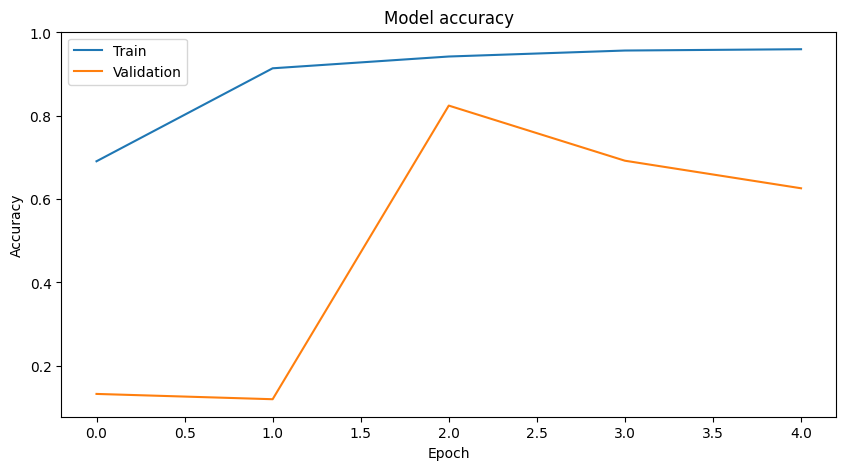

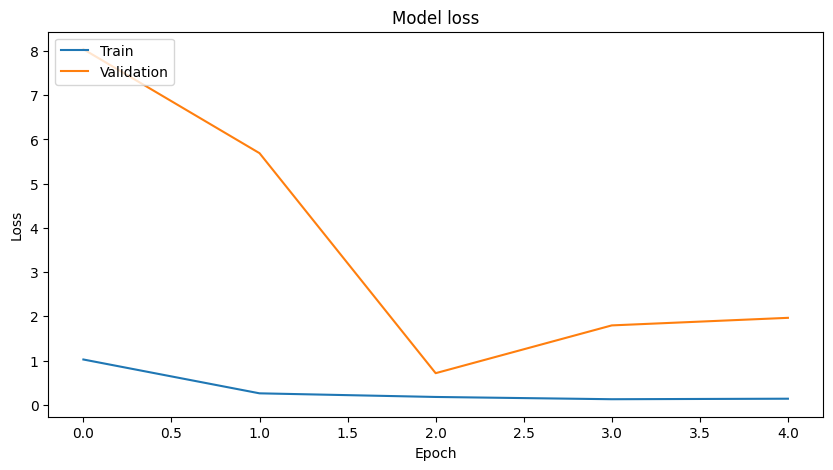

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
model.save("model_MobileNetV2.h5")

In [ ]:
x_test = np.array(test_image_data)
y_test = np.array(test_image_labels)
x_test = x_test / 255.0

y_test_encoded = to_categorical(y_test, NUM_CATEGORIES)

loss, accuracy = model.evaluate(x_test, y_test_encoded, verbose=0)

print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

Test Loss: 2.2610
Test Accuracy: 0.6089


22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 134ms/step
Confusion Matrix (raw):
[[ 0  0  0 ...  0  0  0]
 [ 0 32  0 ...  0  0  0]
 [ 0  5 15 ...  0  0  0]
 ...
 [ 0  0  0 ...  3  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  1]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.60      0.82      0.70        39
           2       0.83      0.45      0.59        33
           3       0.22      1.00      0.37        26
           4       0.93      0.73      0.82        37
           5       0.25      0.54      0.34        28
           6       0.24      0.45      0.31        11
           7       0.80      0.17      0.29        23
           8       0.00      0.00      0.00        25
           9       0.64      0.82      0.72        28
          10       0.97      0.85      0.91        40
          11       1.00      0.78      0.88        18
          12       1.00      0.79      0.88        2

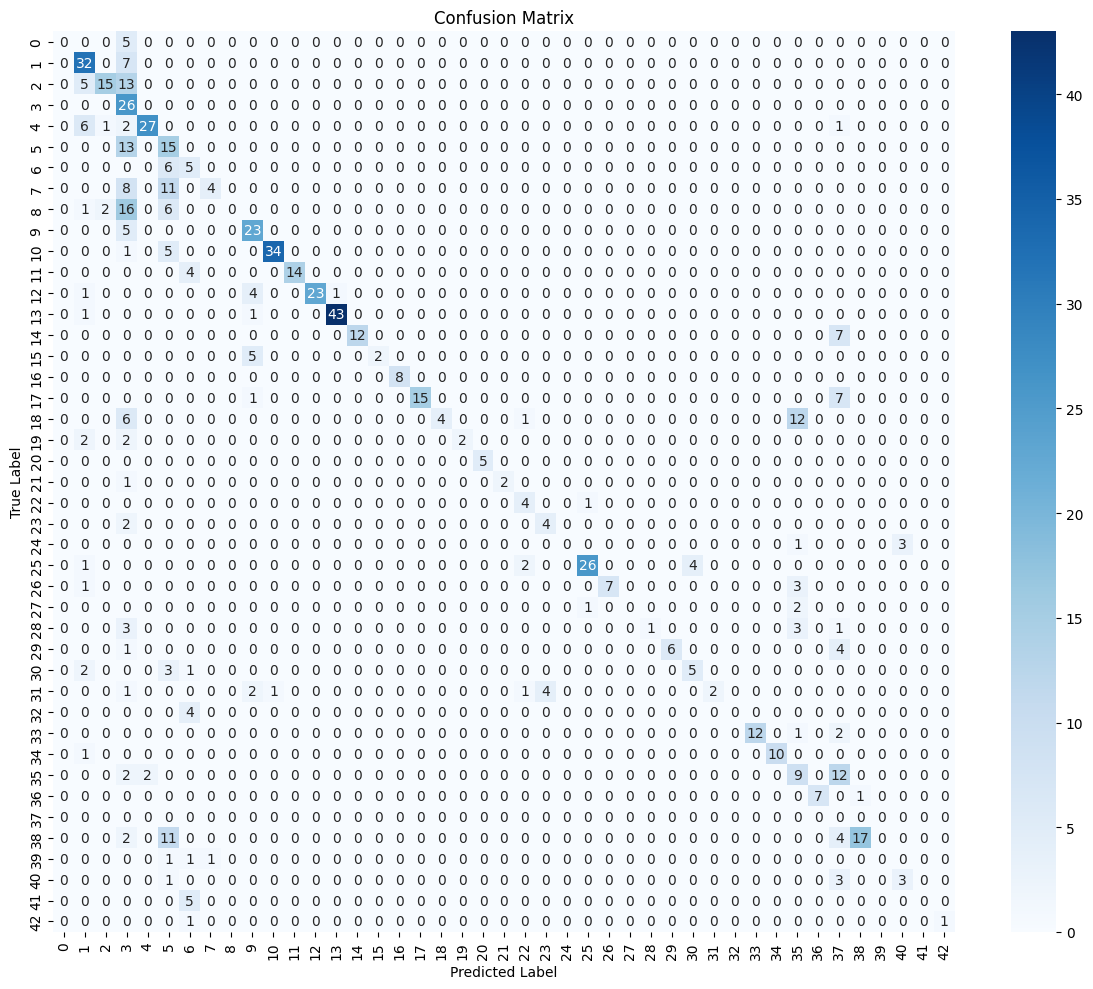

In [ ]:
y_pred = model.predict(x_test)

# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

conf_matrix = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix (raw):")
print(conf_matrix)

unique_labels = np.unique(y_test)
class_report = classification_report(y_test, y_pred_classes,
                                     target_names=[str(i) for i in range(NUM_CATEGORIES)],
                                     labels=unique_labels)
print("\nClassification Report:")
print(class_report)

# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=[str(i) for i in range(NUM_CATEGORIES)],
            yticklabels=[str(i) for i in range(NUM_CATEGORIES)])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


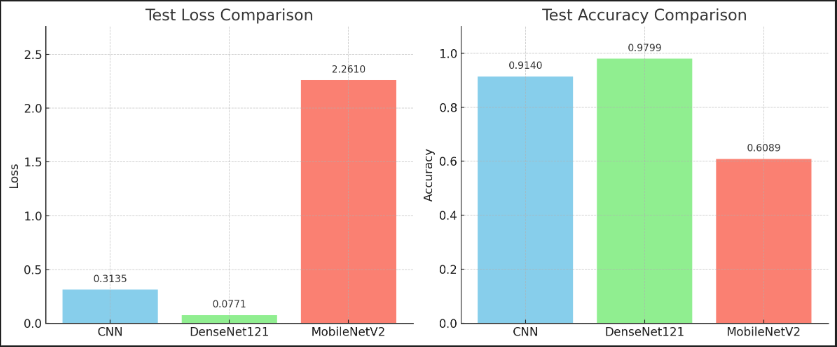

In [ ]:
from IPython.display import Image
Image('/content/traidff .png')

## ***Insights***

➤ Densenet121 models with the highest test accuracy of 97.99%, indicating exceptional performance in classifying the data.

➤ Densenet121 has the lowest test loss (0.0771), indicating the most accurate and confident predictions among the models.

## **Challenges Faced**

➤ **Model depth impacts performance:** Deeper architectures like DenseNet121 capture more complex patterns, leading to better accuracy compared to shallower CNNs.

➤ **Lightweight models need tuning:** MobileNetV2 underperformed, suggesting that smaller models often require careful fine-tuning to match task complexity.




## **Final Recommendation:**

➤ Use DenseNet121 for the best accuracy and reliability in production environments.

➤ Deploy Densenet121 models when you need a good balance between performance and resource usage.
